# **Air Quality - Statistical and Hypothesis Testing**

# **Explore confidence intervals and hypothesis testing**

# Confidence intervals

# *Introduction*
>The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. 
>A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health.
>The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 10 or above.
>The Ripple Renewable Energy (RRE) operates in the following U.S. states: California, Florida, Michigan, Ohio, Pennsylvania, Texas. I want to conduct an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted.

# 1: Imports

In [52]:
# Import relevant packages.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [53]:
# Use read_csv() to import the data.

aqi = pd.read_csv('/Users/harshitrathi/Desktop/c4_epa_air_quality.csv')

# 2: Data exploration

In [54]:
aqi.head(10)

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


In [7]:
aqi.tail(10)

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
250,250,2018-01-01,California,Los Angeles,West Los Angeles,West Los Angeles,Carbon monoxide,Parts per million,0.655556,11
251,251,2018-01-01,Colorado,Denver,Denver,La Casa,Carbon monoxide,Parts per million,0.342105,5
252,252,2018-01-01,Ohio,Hamilton,Cincinnati,Cincinnati Near Road,Carbon monoxide,Parts per million,0.226316,3
253,253,2018-01-01,Oregon,Washington,Tualatin,Tualatin Bradbury Court (TBC) - Near Road Site,Carbon monoxide,Parts per million,0.100000,1
254,254,2018-01-01,Arizona,Pima,Tucson,CHERRY & GLENN,Carbon monoxide,Parts per million,0.563158,14
255,255,2018-01-01,District Of Columbia,District of Columbia,Washington,Near Road,Carbon monoxide,Parts per million,0.244444,3
256,256,2018-01-01,Wisconsin,Dodge,Kekoskee,HORICON WILDLIFE AREA,Carbon monoxide,Parts per million,0.200000,2
257,257,2018-01-01,Kentucky,Jefferson,Louisville,CANNONS LANE,Carbon monoxide,Parts per million,0.163158,2
258,258,2018-01-01,Nebraska,Douglas,Omaha,NaN,Carbon monoxide,Parts per million,0.421053,9
259,259,2018-01-01,North Carolina,Wake,Not in a city,Triple Oak,Carbon monoxide,Parts per million,0.188889,2


In [9]:
aqi.shape

(260, 10)

In [12]:
aqi.describe(include='all')

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,260.000000,260,260,260,260,257,260,260,260.000000,260.000000
unique,NaN,1,52,149,190,253,1,1,NaN,NaN
top,NaN,2018-01-01,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,NaN,260,66,14,21,2,260,260,NaN,NaN
mean,129.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.403169,6.757692
std,75.199734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.317902,7.061707
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,64.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.000000
50%,129.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276315,5.000000
75%,194.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516009,9.000000


In [11]:
aqi.isnull().sum()

Unnamed: 0          0
date_local          0
state_name          0
county_name         0
city_name           0
local_site_name     3
parameter_name      0
units_of_measure    0
arithmetic_mean     0
aqi                 0
dtype: int64

In [13]:
print("Use describe() to summarize AQI")
print(aqi.describe(include='all'))

print("For a more thorough examination of observations by state use values_counts()")
print(aqi['state_name'].value_counts())

print('for a more')

Use describe() to summarize AQI
        Unnamed: 0  date_local  state_name  county_name      city_name  \
count   260.000000         260         260          260            260   
unique         NaN           1          52          149            190   
top            NaN  2018-01-01  California  Los Angeles  Not in a city   
freq           NaN         260          66           14             21   
mean    129.500000         NaN         NaN          NaN            NaN   
std      75.199734         NaN         NaN          NaN            NaN   
min       0.000000         NaN         NaN          NaN            NaN   
25%      64.750000         NaN         NaN          NaN            NaN   
50%     129.500000         NaN         NaN          NaN            NaN   
75%     194.250000         NaN         NaN          NaN            NaN   
max     259.000000         NaN         NaN          NaN            NaN   

       local_site_name   parameter_name   units_of_measure  arithmetic_mean  \


# Key insights:

1. All of the sites collected data on January 1st, 2018.
2. The minimum AQI value is 0 and the maximum AQI value is 50.
3. All states are not equally represented. California has 66 sites that reported AQI for this dataset, while states such as Delaware and        Alabama have only one site that reported AQI.
4. I have county-level data for the first hypothesis.
5. Ohio and New York both have a higher number of observations to work with in this dataset.

# 3: Statistical tests 

Summarize the mean AQI for RRE states

In [36]:
# Summarize the mean AQI for RRE states.

# Create a list of RRE states.

rre_states = ['California','Florida','Michigan','Ohio','Pennsylvania','Texas']

# Subset `aqi` to only consider these states.

aqi_rre = aqi[aqi['state_name'].isin(rre_states)]

# Find the mean aqi for each of the RRE states.

aqi_rre.groupby(['state_name']).agg({"aqi":"mean","state_name":"count"}) #alias as aqi_rre


,aqi,state_name
state_name,,
California,12.121212,66
Florida,5.500000,12
Michigan,8.111111,9
Ohio,3.333333,12
Pennsylvania,2.900000,10
Texas,2.700000,10


Construct a boxplot visualization for the AQI of these states

Create an in-line visualization showing the distribution of aqi by state_name

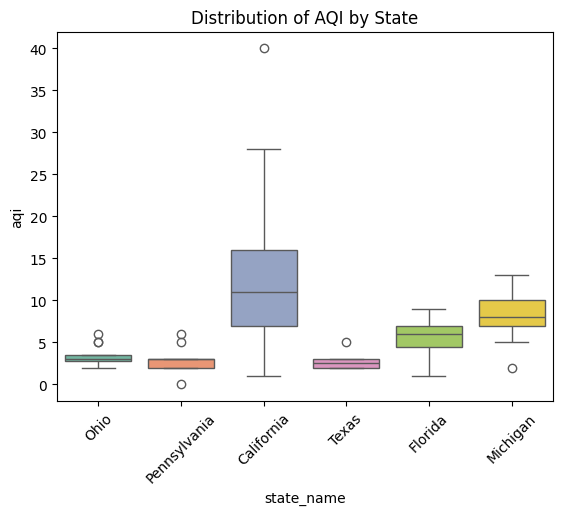

In [68]:
palette = sns.color_palette("Set2", n_colors=aqi_rre['state_name'].nunique())

sns.boxplot(x="state_name", y="aqi", data=aqi_rre, hue="state_name", palette=palette, legend=False)

plt.title("Distribution of AQI by State")
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # Hide legend
plt.show()

**Key insights:**

*California: The mean and a signficant portion of the boxplot range over 10.

*Michigan: While the mean is below 10, the boxplot ranges above 10.

**Construct a confidence interval for the RRE state with the highest mean AQI**

The four-step process for constructing a confidence interval:

1.Identify a sample statistic.

2.Choose a confidence level.

3.Find the margin of error.

4.Calculate the interval.

**Construct your sample statistic**

In [75]:
# Find the mean aqi for your state.

aqi_ca = aqi[aqi['state_name']=='California']

sample_mean = aqi_ca['aqi'].mean()
print(sample_mean)

12.121212121212121


**Choose the confidence level**

In [76]:
# Input the confidence level.

confidence_level = 0.95
confidence_level

0.95

*Find the margin of error (ME)*

**margin of error = z * standard error**, 

where z is the appropriate z-value for the given confidence level. To calculate margin of error:

Find z-value.

Find the approximate z for common confidence levels.

Calculate the standard error estimate.

| Confidence Level | Z Score |
|------------------|---------|
| 90%              | 1.65    |
| 95%              | 1.96    |    
| 99%              | 2.58    |


In [79]:
# Calculate the margin of error.

# Begin by identifying the z associated with the chosen confidence level.

z_value = 1.96

# Next, calculate the standard error.

standard_error = aqi_ca['aqi'].std() / np.sqrt(aqi_ca.shape[0])
print("standard error:")
print(standard_error)

# Lastly, use the preceding result to calculate the margin of error.

margin_of_error = standard_error * z_value
print("margin of error:")
print(margin_of_error)

standard error:
0.8987209641127412
margin of error:
1.7614930896609726


**Calculate the interval**

In [81]:
# Calculate the confidence interval (upper and lower limits).

upper_ci_limit = sample_mean + margin_of_error
lower_ci_limit = sample_mean - margin_of_error
print(lower_ci_limit, upper_ci_limit)

10.359719031551148 13.882705210873095


# 4: Results and evaluation

**Recalculate the confidence interval**

In [89]:
stats.norm.interval(confidence=confidence_level, loc=sample_mean, scale=standard_error)

(np.float64(10.359751399400034), np.float64(13.882672843024208))

*Considerations*

*My findings:*

- This notebook conveys the analytical process and describe the methodology behind constructing the confidence interval.
- A confidence interval at the 95% level of confidence from this sample data yielded [10.36 , 13.88], which provides the interpretation "given the observed sample AQI measurements, there is a 95% confidence that the population mean AQI for California was between 10.36 and 13.88. This range is notably greater than 10."
- If I varied the confidence level to 99%, the confidence interval would become [9.80 , 14.43].

# Hypothesis testing

**Introduction**

Repair Our Air (ROA) is formulating policy recommendations to improve the air quality in America, using the Environmental Protection Agency's Air Quality Index (AQI) to guide their decision making.

I am conducting hypothesis tests to make a recommendation:

1. ROA is considering a metropolitan-focused approach. Within California, they want to know if the mean AQI in Los Angeles County is statistically different from the rest of California.
2. With limited resources, ROA has to choose between New York and Ohio for their next regional office. Does New York have a lower AQI than Ohio?
3. A new policy will affect those states with a mean AQI of 10 or greater. Can you rule out Michigan from being affected by this new policy?

**Notes:**
1. I'll default to a 5% level of significance.
2. Throughout the project, for two-sample t-tests, use Welch's t-test (i.e., setting the equal_var parameter to False in    scipy.stats.ttest_ind()). This will account for the possibly unequal variances between the two groups in the comparison.

**1. Statistical Tests**

Steps for conducting hypothesis testing:

1. Formulate the null hypothesis and the alternative hypothesis.
2. Set the significance level.
3. Determine the appropriate test procedure.
4. Compute the p-value.
5. Draw a conclusion.

**Hypothesis 1: ROA is considering a metropolitan-focused approach. Within California, they want to know if the mean AQI in Los Angeles County is statistically different from the rest of California.**

In [90]:
# Create dataframes for each sample being compared in the test

ca_la = aqi[aqi['county_name']=='Los Angeles']
ca_other = aqi[(aqi['state_name']=='California') & (aqi['county_name']!='Los Angeles')]

Formulate my hypothesis:

Formulate my null and alternative hypotheses:

- $H_0$
 : There is no difference in the mean AQI between Los Angeles County and the rest of California.

- $H_A$
 : There is a difference in the mean AQI between Los Angeles County and the rest of California.

Set the significance level:

In [91]:
# For this analysis, the significance level is 5%

significance_level = 0.05
significance_level

0.05

Determine the appropriate test procedure

Here, I am comparing the sample means between two independent samples. Therefore, I will utilize a **two-sample 𝑡-test**.

Compute the p-value

In [92]:
# Compute the p-value here

stats.ttest_ind(a=ca_la['aqi'], b=ca_other['aqi'], equal_var=False)

TtestResult(statistic=np.float64(2.1107010796372014), pvalue=np.float64(0.049839056842410995), df=np.float64(17.08246830361151))

**Key insight:**

With a p-value (0.049) being less than 0.05 (as your significance level is 5%), 
reject the null hypothesis in favor of the alternative hypothesis.

Therefore, a metropolitan strategy may make sense in this case.

**Hypothesis 2: With limited resources, ROA has to choose between New York and Ohio for their next regional office. Does New York have a lower AQI than Ohio?**

In [93]:
# Create dataframes for each sample being compared in the test

ny = aqi[aqi['state_name']=='New York']
ohio = aqi[aqi['state_name']=='Ohio']

Formulate my hypothesis:

**Formulate my null and alternative hypotheses:**

- $H_0$ : The mean AQI of New York is greater than or equal to that of Ohio.
- $H_A$ : The mean AQI of New York is below that of Ohio.

Significance Level (remains at 5%)

Determine the appropriate test procedure:
Here, I am comparing the sample means between two independent samples in one direction. Therefore, I will utilize a **two-sample 𝑡-test.**

Compute the p-value

In [94]:
# Compute the p-value here

tstat, pvalue = stats.ttest_ind(a=ny['aqi'], b=ohio['aqi'], alternative='less', equal_var=False)
print(tstat)
print(pvalue)

-2.025951038880333
0.03044650269193468


**Key insight:**

With a p-value (0.030) of less than 0.05 (as your significance level is 5%) and a t-statistic < 0 (-2.036), 

reject the null hypothesis in favor of the alternative hypothesis.


Therefore, I can conclude at the 5% significance level that New York has a lower mean AQI than Ohio.

**Hypothesis 3: A new policy will affect those states with a mean AQI of 10 or greater. Can you rule out Michigan from being affected by this new policy?**


In [96]:
# Create dataframes for each sample being compared in a test

michigan = aqi[aqi['state_name']=='Michigan']


Formulate my hypothesis:

**Formulate my null and alternative hypotheses:**

- $H_0$ : The mean AQI of Michigan is less than or equal to 10.
- $H_A$ : The mean AQI of Michigan is greater than 10.

Significance Level (remains at 5%)
Determine the appropriate test procedure:

Here, I am comparing one sample mean relative to a particular value in one direction. Therefore, I will utilize a **one-sample 𝑡-test.**

Compute the p-value

In [97]:
# Compute the p-value here

tstat, pvalue = stats.ttest_1samp(michigan['aqi'], 10, alternative='greater')
print(tstat)
print(pvalue)

-1.7395913343286131
0.9399405193140109


**Key insight:**

With a p-value (0.940) being greater than 0.05 (as my significance level is 5%) and a t-statistic < 0 (-1.74), 
**fail to reject the null hypothesis.**

Therefore, I cannot conclude at the 5% significance level that Michigan's mean AQI is greater than 10. This implies that Michigan would not be affected by the new policy.


### ✅ Conclusion Summary:

Based on the results of the three hypothesis tests:

#### **Hypothesis 1:**
- The p-value (0.049) is less than the significance level of 0.05.  
- Hence, we **reject the null hypothesis** and conclude that a **metropolitan strategy may be effective** in this case.

#### **Hypothesis 2:**
- The p-value (0.030) is less than 0.05, and the t-statistic is negative (-2.036).  
- Therefore, we **reject the null hypothesis** and conclude that **New York has a significantly lower mean AQI** compared to others at the 5% significance level.

#### **Hypothesis 3:**
- The p-value (0.940) is greater than 0.05, despite the negative t-statistic (-1.74).  
- Hence, we **fail to reject the null hypothesis**, indicating **no significant evidence that Michigan’s mean AQI is greater than 10**.  
- Thus, **Michigan may not be impacted by the new policy**.

---

#### ✅ **Overall Insight:**
These results suggest that while some regions like New York and metropolitan areas may benefit from targeted strategies, others like Michigan may not require immediate intervention under the current AQI thresholds.
